In [1]:
# import all relevant libraries dependencies and set up the backend
import time
import IPython
import numpy as np
import matplotlib
import math
import pandas
import pickle
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
import scipy.special 
import scipy.optimize
import scipy.sparse.linalg as LA
import scipy.sparse as sparse
from scipy.io import loadmat
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

# add the ED.py functions to the notebook
import sys
import hubbard as ED 

from matplotlib import animation, rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':12})
# rc('font',**{'family':'serif','serif':['FreeSerif'],'size':12})
rc('text', usetex=True)
from cycler import cycler

c1_a = '#003AF0'
c2_a = '#008F24'
c3_a = '#FE7B22'
c4_a = '#FE000C'
c5_a = '#FB30F2'
c6_a = '#82E0AA' #'#FFE135'
c7_a = '#9966CC'
c8_a = '#7FFFD4'
c9_a = '#66FF00'
c10_a = '#8B008B'
c11_a = '#000000'
colours = [c1_a,c2_a,c3_a,c4_a,c5_a,c6_a,c7_a,c8_a,c9_a,c10_a,c11_a]

matplotlib.rcParams['backend']='MacOSX'
matplotlib.rcParams['savefig.dpi']=250
matplotlib.rcParams['text.usetex']=True
# matplotlib.rcParams['text.latex.unicode']=True
# matplotlib.rcParams['axes.color_cycle'] = [c1_ac2_ac3_ac4_ac5_a]
matplotlib.rcParams['axes.prop_cycle'] = cycler('color',colours)
# matplotlib.rcParams['axes.'] = \in\
# matplotlib.rcParams['legend.fancybox']=True
matplotlib.rcParams['legend.frameon']=False
# matplotlib.rcParams['legend.fontsize']=10
matplotlib.rcParams['figure.figsize'] = (10,8)
# matplotlib.rcParams['axes.color_cycle'] = colors
# matplotlib.rcParams['axes.prop_cycle'] = colors

In [8]:
# define system parameters
p = {}
p['L'] = 2 # system length
p['W'] = 3 # system width
p['N1'] = 3 # number of particles in 1
p['N2'] = 3 # number of particles in 2
p['t1'] = 1.0 # hopping for species 1
p['t2'] = 1.0 # hopping for species 2
p['U12'] = 0.0 # on-site interaction between 1 and 2
p['mu1'] = 0.0 # chemical potential for 1
p['mu2'] = 0.0 # chemical potential for 2
p['t_initial'] = 0.0 # begin of time evolution
p['dt'] = 0.1#1e-2 # time-step
p['t_final'] = 1.0 # end of time evolution
p['N'] = p['L'] * p['W'] # system size

In [3]:
# get state table and dimension of Hilberspace
state_table = ED.generate_state_table(p)
print("dim(H) = %i" % (len(state_table)))

# look at particular states
i = 3
state_int = state_table[i]
state = ED.int_to_state(p, state_int)
print("state #%i has the unique id (%i)" % (i, state_int), \
      "and looks like:\n", ED.reshape_state(p, state))
state_projection = ED.project_state_into_spinsectors(ED.int_to_state(p, state_table[i]))
print("Decomposed into its spin-compontents it reads: \n")
print("Spin-Up = 1 : ", state_projection[0], "\n")
print("Spin-Up = 2 : ", state_projection[1], "\n")

# construct a certain product state
statelist = [3,0,2,3,0,1]
state_int = ED.state_to_int(p, statelist)
i = state_table.index(state_int)
state = ED.int_to_state(p, state_int)
print("state #%i has the unique id (%i)" % (i,state_int), \
      "and looks like:", ED.reshape_state(p, state))
state_projection = ED.project_state_into_spinsectors(ED.int_to_state(p, state_table[i]))
print("Decomposed into its spin-compontents it reads: \n")
print("Spin-Up = 1 : ", state_projection[0], "\n")
print("Spin-Up = 2 : ", state_projection[1], "\n")

dim(H) = 400
state #3 has the unique id (126) and looks like:
 [[0. 0. 1.]
 [2. 3. 3.]]
Decomposed into its spin-compontents it reads: 

Spin-Up = 1 :  [0 0 1 1 1 0] 

Spin-Up = 2 :  [0 0 0 1 1 1] 

state #325 has the unique id (3249) and looks like: [[3. 0. 2.]
 [1. 0. 3.]]
Decomposed into its spin-compontents it reads: 

Spin-Up = 1 :  [1 0 0 1 0 1] 

Spin-Up = 2 :  [1 0 1 1 0 0] 



In [4]:
# Check if Fermi-Sign works properly
# It should count the occupied sites from (i,sigma) to (j, tau) (excluding both the former, and the latter)
# If the number is odd, we get a -ive sign, else +ive

# Why? Because we only have correlators of the form <c^{dagger}_{i,sigma}c_{j,tau}> (c.f. hopping and nk 
# matrices) and rewriting this in terms of Jordan-Wigner strings gives <a^{dagger}_{i,sigma}(JW)a_{j,tau}>
# where JW = F_{i,alpha>=sigma}F_{i+1}...F_{j-1}F{j,beta<tau}, now at the beginning of the correlator we thus 
# have a^{dagger}_{i,sigma}F_{i,sigma} and since a^{dagger} only gives sth. non-zero if it acts on an empty site 
# |0>, F_{i,sigma}|0> = 1, so we can simplify this to get a^{dagger}_{i,sigma}F_{i,sigma} = a^{dagger}_{i,sigma}
# JW -> Thus F_{i,alpha>sigma}F_{i+1}...F_{j-1}F{j,beta<tau} and therefore ONLY includes F matrices which are 
# strictly between (i,sigma) and (j,tau)


# select state
i = 25
state_int = state_table[i]
state = ED.int_to_state(p, state_int)
state_projection = ED.project_state_into_spinsectors(ED.int_to_state(p, state_int))
reshaped_state_proj = ED.reshape_projected_states(p, state_projection)
print("state id: ", state_int, "\n")
print("state = ", state, "\n")
print("spin1 = \n", reshaped_state_proj[0], "\n")
print("spin2 = \n", reshaped_state_proj[1], "\n")

print('For (spin, site)')

i = 0
sigma = 1
for tau in [1, 2]:
    for j in range(p['N']):
        print("b/w (%i,%i) and (%i,%i)" % (sigma, i, tau, j),
              " => Fsgn = ", ED.fermisign(state_projection, i, j, sigma, tau))

state id:  423 

state =  [0, 1, 2, 2, 1, 3] 

spin1 = 
 [[0. 1. 0.]
 [1. 1. 0.]] 

spin2 = 
 [[0. 0. 1.]
 [1. 0. 1.]] 

For (spin, site)
b/w (1,0) and (1,0)  => Fsgn =  1
b/w (1,0) and (1,1)  => Fsgn =  1
b/w (1,0) and (1,2)  => Fsgn =  -1
b/w (1,0) and (1,3)  => Fsgn =  -1
b/w (1,0) and (1,4)  => Fsgn =  -1
b/w (1,0) and (1,5)  => Fsgn =  1
b/w (1,0) and (2,0)  => Fsgn =  -1
b/w (1,0) and (2,1)  => Fsgn =  -1
b/w (1,0) and (2,2)  => Fsgn =  -1
b/w (1,0) and (2,3)  => Fsgn =  1
b/w (1,0) and (2,4)  => Fsgn =  -1
b/w (1,0) and (2,5)  => Fsgn =  -1


In [5]:
# do GS search
E0, GS, state_table = ED.calculate_gs(p)
print("E0 = %.6g" % (E0))

E0 = -8.9282


In [6]:
# do GS evolution - should see no dynamics, all is constant in time (since we're in an eigenstate)
tic = time.time()
sim, state_table = ED.evolve(p, state_table, GS, kind='ket', correlation_measurement=True)
toc = time.time()
print("Elapsed time = ", toc-tic, "s")

/Users/natalie/Dropbox/ResourceEstimation/exact_diagonalisation/hubbard_1d.py:685: UserWarning: No correlation for lattices, tough break pal
  warnings.warn('No correlation for lattices, tough break pal')


Elapsed time =  0.8658628463745117 s


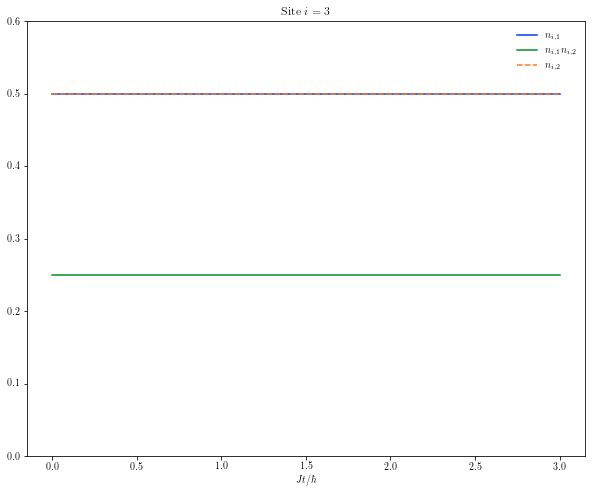

In [7]:
# Plot Results
fig = plt.figure(figsize=(10,8))
i = 3
plt.plot(sim['Time'], sim['Re(N1 Site %i)' % (i)], '-', label=r'$n_{i,1}$')
plt.plot(sim['Time'], sim['Re(N12 Site %i)' % (i)], '-', label=r'$n_{i,1}n_{i,2}$')
plt.plot(sim['Time'], sim['Re(N2 Site %i)' % (i)], '--', label=r'$n_{i,2}$')
plt.legend()
plt.title(r'$\textrm{Site} ~ i = %i$' % (i))
plt.ylim([0.0, 0.6])
plt.xlabel(r'$Jt/\hbar$')
plt.show()
plt.close()

if 'k' in sim:
    fig = plt.figure(figsize=(10,8))
    for m in range(p['N']):
        plt.plot(sim['Time'], sim['nk1'][m,:], '-', label=r'$n_{k_{%i},1}$' % (m+1))
    plt.legend()
    plt.xlabel(r'$Jt/\hbar$')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(10,8))
    for i in range(0, len(sim['Time']), 25):
        plt.plot(sim['k']/np.pi, sim['nk1'][:,i], '.-', label=r'$t=%.2f$' % (sim['Time'][i]))
    plt.legend()
    plt.xlabel(r'$k/\pi$')
    plt.ylabel(r'$n_{k,1}$')
    plt.show()
    plt.close()

In [9]:
# do evolution from a product state (not an eigenstate) - should see dynamics
tic = time.time()
state = ED.int_to_state(p, state_table[5])
# sim, state_table = ED.evolve(p, state_table, state_table[5], kind="int", correlation_measurement=True)
sim, state_table = ED.evolve(p, state_table, state, kind="list", correlation_measurement=False,
                            trotterised=False)
toc = time.time()
print("Elapsed time = ", toc-tic, "s")

Elapsed time =  0.601938009262085 s


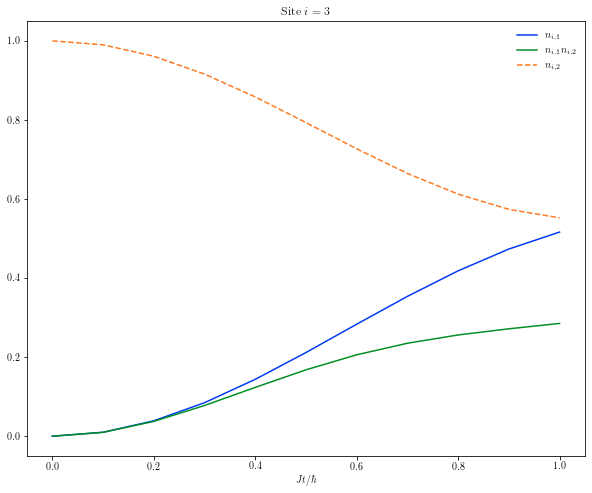

In [10]:
# Plot Results
fig = plt.figure(figsize=(10,8))
i = 3
plt.plot(sim['Time'], sim['Re(N1 Site %i)' % (i)], '-', label=r'$n_{i,1}$')
plt.plot(sim['Time'], sim['Re(N12 Site %i)' % (i)], '-', label=r'$n_{i,1}n_{i,2}$')
plt.plot(sim['Time'], sim['Re(N2 Site %i)' % (i)], '--', label=r'$n_{i,2}$')
plt.legend()
plt.title(r'$\textrm{Site} ~ i = %i$' % (i))
plt.xlabel(r'$Jt/\hbar$')
plt.show()
plt.close()

if 'k' in sim:
    fig = plt.figure(figsize=(10,8))
    for m in range(p['N']):
        plt.plot(sim['Time'], sim['nk1'][m,:], '-', label=r'$n_{k_{%i},1}$' % (m+1))
    plt.legend()
    plt.xlabel(r'$Jt/\hbar$')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(10,8))
    for i in range(0, len(sim['Time']), 100):
        plt.plot(sim['k']/np.pi, sim['nk1'][:,i], '.-', label=r'$t=%.2f$' % (sim['Time'][i]))
    plt.legend()
    plt.xlabel(r'$k/\pi$')
    plt.ylabel(r'$n_{k,1}$')
    plt.show()
    plt.close()

In [11]:
# same evolution but trotterised
tic = time.time()
state = ED.int_to_state(p, state_table[5])
# sim, state_table = ED.evolve(p, state_table, state_table[5], kind="int", correlation_measurement=True)
sim_trott, state_table = ED.evolve(p, state_table, state, kind="list", correlation_measurement=False,
                            trotterised=True)
toc = time.time()
print("Elapsed time = ", toc-tic, "s")

sim_errors = ED.calculate_average_errors(p, sim, sim_trott)

Elapsed time =  0.9394769668579102 s


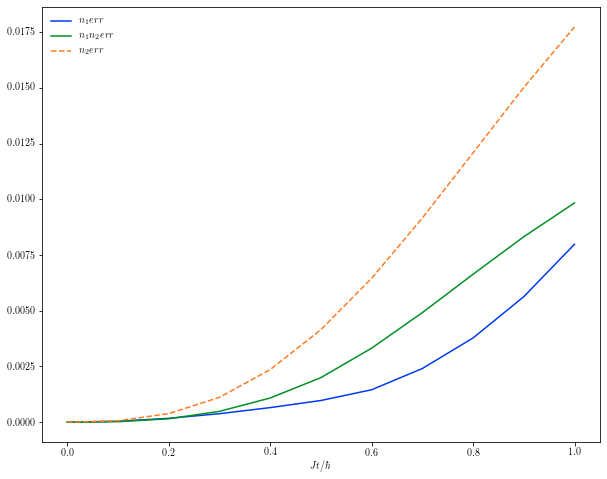

In [12]:
# Plot Errors
fig = plt.figure(figsize=(10,8))
i = 3
plt.plot(sim_errors['Time'], sim_errors['Re(N1)'], '-', label=r'$n_1 err$')
plt.plot(sim_errors['Time'], sim_errors['Re(N12)'], '-', label=r'$n_1n_2 err$')
plt.plot(sim_errors['Time'], sim_errors['Re(N2)'], '--', label=r'$n_2 err$')
plt.legend()
plt.xlabel(r'$Jt/\hbar$')
plt.show()
plt.close()

if 'k' in sim_errors:
    fig = plt.figure(figsize=(10,8))
    for m in range(p['N']):
        plt.plot(sim['Time'], sim['nk1'][m,:], '-', label=r'$n_{k_{%i},1}$' % (m+1))
    plt.legend()
    plt.xlabel(r'$Jt/\hbar$')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(10,8))
    for i in range(0, len(sim['Time']), 100):
        plt.plot(sim['k']/np.pi, sim['nk1'][:,i], '.-', label=r'$t=%.2f$' % (sim['Time'][i]))
    plt.legend()
    plt.xlabel(r'$k/\pi$')
    plt.ylabel(r'$n_{k,1}$')
    plt.show()
    plt.close()

In [12]:
# do Quench evolution - find GS to initial Hamiltonian and evolve with final Hamiltonian

# initial Hamiltonian U12 = 0.0
p['U12'] = 0.0
E0, GS, state_table = ED.calculate_gs(p)

# evolve with final Hamiltonian U12 = -2.0
p['U12'] = -2.0
tic = time.time()
sim, state_table = ED.evolve(p, state_table, GS, kind='ket', correlation_measurement=True)
toc = time.time()
print("Elapsed time = ", toc-tic, "s")

/Users/natalie/Dropbox/ResourceEstimation/exact_diagonalisation/hubbard_1d.py:652: UserWarning: No correlation for lattices, tough break pal
  warnings.warn('No correlation for lattices, tough break pal')


Elapsed time =  1.0078179836273193 s


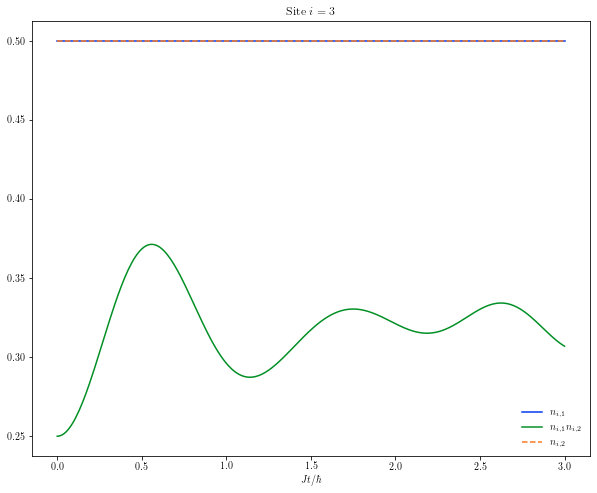

In [13]:
# Plot Results
fig = plt.figure(figsize=(10,8))
i = 3
plt.plot(sim['Time'], sim['Re(N1 Site %i)' % (i)], '-', label=r'$n_{i,1}$')
plt.plot(sim['Time'], sim['Re(N12 Site %i)' % (i)], '-', label=r'$n_{i,1}n_{i,2}$')
plt.plot(sim['Time'], sim['Re(N2 Site %i)' % (i)], '--', label=r'$n_{i,2}$')
plt.legend()
plt.title(r'$\textrm{Site} ~ i = %i$' % (i))
plt.xlabel(r'$Jt/\hbar$')
plt.show()
plt.close()

if 'k' in sim:
    fig = plt.figure(figsize=(10,8))
    for m in range(p['N']):
        plt.plot(sim['Time'], sim['nk1'][m,:], '-', label=r'$n_{k_{%i},1}$' % (m+1))
    plt.legend()
    plt.xlabel(r'$Jt/\hbar$')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(10,8))
    for i in range(0, len(sim['Time']), 50):
        plt.plot(sim['k']/np.pi, sim['nk1'][:,i], '.-', label=r'$t=%.2f$' % (sim['Time'][i]))
    plt.legend()
    plt.xlabel(r'$k/\pi$')
    plt.ylabel(r'$n_{k,1}$')
    plt.show()
    plt.close()